# Warmdown - Phase 1 Cumulative

In this lab, we will create a small program that will print out a report for an inputted date.

This program will:

- Receive a month and day, formatted as `month/day/year`
- Parse the date to create individual variables for 
    - Month (string)
    - Day (string)
    - Month (string)
    - Year (string)
    - Month Name (string)
- Query the public holidays api to check if the date was a holiday.
- Connect to the `www.onthisday.com` website and scrape the `Important Events` listed for a given date.
- Manipulate a dataset of stock information in pandas and find the 5 largest stock increases and declines for and inputted day.
- Visualize the the top five increases and declines using subplots.

Some code has been provided to generate the report itself. Your task is to write the following functions:

The goal is to produce a function that will produce the following:

![](example.png)

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Task 1

In the cell below, define a function called `parse_date`.

This function should 
- Receive a single argument `date` with a datatype of string.
- The expected format of the string should be `month/day/year` where both month and day are integers.
- Parse the date variable to seperate the month and day integers.
- Map the month integer to the name of the month using the provided dictionary
- Returns the month (string), the day (string), and the name of the month (string)

An example output for this function would look as follows:

```python
parse_date('06/03/2015')
>> ('06', '03', '2015' ,'June')
```

In [3]:
def parse_date():
    month_map =  {1: 'January', 2: 'February', 3: 'March',
                  4: 'April', 5: 'May', 6: 'June', 7: 'July',
                  8: 'August', 9: 'September', 10:'October', 
                  11: 'Novembers', 12: 'December'}
    
    # Your code here

In [4]:
def parse_date(date):
    
    mapper = {1: 'January', 2: 'February', 3: 'March',
              4: 'April', 5: 'May', 6: 'June', 7: 'July',
              8: 'August', 9: 'September', 10:'October', 
              11: 'Novembers', 12: 'December'}
    month, day, year = date.split('/')
    return month.zfill(2), day.zfill(2), year, mapper[int(month)]

## Task 2

In the cell below, define a function called `holidays_api` 

This function should do the following:

- Receive a single argument called `year` with a datatype of string.
- Connects to the [Public Holidays API](https://date.nager.at/Api) and returns the public holidays data for the inputted year.

An example output of this function would look like this:

```python
holidays_api('2015')
>> [{'date': '2015-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
```

In [5]:
# Your code here

In [6]:
def holidays_api(year):
    url = f'https://date.nager.at/Api/v2/PublicHolidays/{year}/US'
    response = requests.get(url)
    return response.json()

## Task 3

In the cell below, define a function called `is_public_holiday` that receives four arguments
1. month - integer
2. day - integer
4. year - integer
3. holiday_data - list

This function should:
- Loop over the holiday_data list and check if the date is found within the data. If the date is not found, the function should return None. If a date is found, the function should return the name of the holiday.

An example of this function's output looks like this:

```python
is_public_holiday('09', '07', '2015', holiday_data)
>>> 'Labour Day'
```

In [7]:
# Your code here

In [8]:
def is_public_holiday(month, day, year, holiday_data):
    date = f'{year}-{month}-{day}'
    for holiday in holiday_data:
        if holiday['date'] == date:
            return holiday['name']

## Task 4

In the cell below define a function called `get_historical_events` that scrapes the historical events for a given day.

This function should receive 2 arguments:
1. The name of a month
2. The day of the month.

The url format for this problem is as follows:

`f'https://www.onthisday.com/day/{month_name}/{day}'`

This function should return a list of strings for each historical event for the inputted date.

The desired output looks like this 

```python
get_historical_events('July', '07')
>> ['1520 Battle of Otumba, Mexico: Hernán Cortés and the Tlaxcalans defeat a numerically superior Aztec force',
 '1937 Japanese and Chinese troops clash at the Marco Polo Bridge, beginning the Second Sino-Japanese War',
 '1947 Alleged and disputed Roswell UFO incident',
 "2005 Coordinated terrorist bomb blasts strike London's public transport system during the morning rush hour killing 52 and injuring 700",
 '2005 Influenced by Live 8, the G8 leaders pledge to double 2004 levels of aid to Africa from US$25 to US$50 billion by the year 2010',
 '1936 RCA shows 1st real TV program (dancing, film on locomotives, Bonwit Teller fashion show and monologue from Tobacco Road & comedy)',
 "1990 First Three Tenors concert featuring Plácido Domingo, José Carreras and Luciano Pavarotti at Baths of Caracalla in Rome - recording of is world's best-selling classical record",
 "1990 Wimbledon Women's Tennis: Martina Navratilova wins her record 9th Wimbledon singles title beating American Zina Garrison 6-4, 6-1",
 '1932 Author Damon Runyon (51) weds Patrice Amati del Grande',
 '1946 39th US President Jimmy Carter (21) weds Rosalynn Smith (18) in Plains, Georgia',
 '1970 Actress Shelley Duvall (21) weds Bernard Sampson',
 '1943 Heavyweight boxing champ Jack Dempsey (48) divorces broadway singer Hannah Williams (32) after 10 years of marriage',
 '1953 Actor José Ferrer divorces dancer and actress Phyllis Hill after 5 years of marriage',
 '1994 Actress Diane Lane files for divorce from Christopher Lambert']
```

In [9]:
# Your code here

In [10]:
def get_historical_events(month_name, day):    
    url = f'https://www.onthisday.com/day/{month_name}/{day}'
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html)
    events = soup.find_all('li', {'class': 'event'})
    event_details = [event.text for event in events]
    return event_details

## Task 5

Below, we import a dataset containing stock data from 02/2013-02/2018

In [11]:
data = pd.read_csv('archive/all_stocks_5yr.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [12]:
data = pd.read_csv('archive/all_stocks_5yr.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In the cell below, define a function called `find_top_stock_changes` that receives four arguments
1. month - string
2. day - string
3. year - string
4. data - pandas dataframe

This function should return four lists
1. A list of 5 stock names with the highest increases on the inputted day
2. A list of 5 stock names with the highest declines on the inputted day
3. A list of the 5 stock changes for top increases
4. A list of the 5 stock changes for top declines.


An example of this function's output looks like this:
```python
find_top_stock_changes('09', '08', '2015', data)
>> (['REGN', 'PCLN', 'AZO', 'AMZN', 'EQIX'],
 ['NFLX', 'COO', 'MCK', 'RRC', 'PVH'],
 [27.879999999999995,
  12.400000000000091,
  9.860000000000014,
  8.849999999999966,
  8.059999999999945],
 [-7.1299999999999955,
  -3.890000000000015,
  -0.960000000000008,
  -0.9300000000000068,
  -0.7999999999999972])
```

In [13]:
# Your code here

In [14]:
def find_top_stock_changes(month, day, year, data):
    data_ = data[data.date == f'{year}-{month}-{day}']
    top_five_increase = data_.sort_values('change', ascending=False).iloc[:5]
    top_five_declines = data_.sort_values('change').iloc[:5]
    increase_names = top_five_increase.Name.tolist()
    decrease_names = top_five_declines.Name.tolist()

    increase_changes = top_five_increase.change.tolist()
    decrease_changes = top_five_declines.change.tolist()

    return increase_names, decrease_names, increase_changes, decrease_changes

## Task 6

In the cell below, define a function that receives 4 arguments
1. increase_names - A list of 5 stock names with the highest increases on the inputted day
2. decline_names - A list of 5 stock names with the highest declines on the inputted day
3. increase_change - A list of the 5 stock changes for top increases
4. decline_change - A list of the 5 stock changes for top declines.


This function should:

- Output two bar charts next to each other the show the increases and declines for the inputted stock changes.

This function's output should look like this:

![](plot_stock_info.png)

In [15]:
# Your code here

In [16]:
def plot_stock_info(increase_names, decline_names, increase_change, decline_change):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    
    axes[0].bar(increase_names, increase_change, color='green')
    axes[1].bar(decline_names, decline_change, color='red')
    
    axes[0].set_title('Top 5 stock increase')
    axes[1].set_title('Top 5 stock declines')
    

# Put it all together

In the cell below, we provide some code for printing the report.

Run this cell unchanged.

In [17]:
data = pd.read_csv('archive/all_stocks_5yr.csv')
data['change'] = data.close - data.open

def main(date, stock_data):
    month, day, year, month_name = parse_date(date)
    display(Markdown("# {}/{} Report\n\n".format(month, day)))
    holidays_data =  holidays_api(year)
    holiday = is_public_holiday(month, day, year, holidays_data)
    historical_events = get_historical_events(month_name, day)
    increase_names, decrease_names, increase_changes, decrease_changes = find_top_stock_changes(month, day, 
                                                                                           year, data)
    print_holiday(month, day, year, holiday)
    print_historical_events(historical_events)
    if increase_names and decrease_names:
        plot_stock_info(increase_names, decrease_names, increase_changes, decrease_changes)
    else:
        display(Markdown("\n\n**No stock data was found for this day.**"))


def print_holiday(month, day, year, holiday):
    template = ''
    if holiday:
        template += "{}/{}/{} is **{}**!\n\n".format(month, day, year, holiday)
    else:
        template += "**{}/{} was not a public holiday in {}.**".format(month, day, year)
    markdown = Markdown(template)
    display(markdown)
        
def print_historical_events(events):
    
    events_formatted = [f'**{event.split()[0]}** ' + ' '.join(event.split()[1:]) for event in events]
    template = '### Historical Highlights'
    for event in events_formatted:
        template += '\n\n- ' + event

    markdown = Markdown(template)
    display(markdown)
    


In [18]:
data = pd.read_csv('archive/all_stocks_5yr.csv')
data['change'] = data.close - data.open

def main(date, stock_data):
    month, day, year, month_name = parse_date(date)
    display(Markdown("# {}/{} Report\n\n".format(month, day)))
    holidays_data =  holidays_api(year)
    holiday = is_public_holiday(month, day, year, holidays_data)
    historical_events = get_historical_events(month_name, day)
    increase_names, decrease_names, increase_changes, decrease_changes = find_top_stock_changes(month, day, 
                                                                                           year, data)
    print_holiday(month, day, year, holiday)
    print_historical_events(historical_events)
    if increase_names and decrease_names:
        plot_stock_info(increase_names, decrease_names, increase_changes, decrease_changes)
    else:
        display(Markdown("\n\n**No stock data was found for this day.**"))


def print_holiday(month, day, year, holiday):
    template = ''
    if holiday:
        template += "{}/{}/{} is **{}**!\n\n".format(month, day, year, holiday)
    else:
        template += "**{}/{} was not a public holiday in {}.**".format(month, day, year)
    markdown = Markdown(template)
    display(markdown)
        
def print_historical_events(events):
    
    events_formatted = [f'**{event.split()[0]}** ' + ' '.join(event.split()[1:]) for event in events]
    template = '### Historical Highlights'
    for event in events_formatted:
        template += '\n\n- ' + event

    markdown = Markdown(template)
    display(markdown)
    


# Run your code

If each of your functions were named correctly, received the correct number of arguments and in the correct order, and output the correct data, the following function should generate the report!

# 09/08 Report



**09/08 was not a public holiday in 2015.**

### Historical Highlights

- **1380** Battle on Kulikovo: Moscow's great monarch Dimitri defeats the Mongols beginning the decline of the Tatars

- **1504** Michelangelo's Statue of David is unveiled in Florence

- **1522** Spanish navigator Juan de Elcano returns to Spain, completing 1st circumnavigation of the globe (expedition began under Ferdinand Magellan)

- **1565** 1st permanent European settlement in the US founded at St. Augustine, Florida

- **1664** Dutch surrender colony of New Netherlands (including New York) to 300 English soldiers

- **1965** A small ad in New York’s Daily Variety attracts 437 young men interested in forming the world’s first manufactured boy band, "The Monkees"

- **1970** Black September hijackings begin, three airliners hijacked and blown up by Popular Front for the Liberation of Palestine

- **1986** "The Oprah Winfrey Show" is first broadcast nationally

- **1960** Nationwide release (US) of Alfred Hitchcock's "Psycho" starring Anthony Perkins and Janet Leigh

- **2001** Kylie Minogue releases her single "I Just Can't Get You Out of My Head", the biggest of her career

- **1973** Hank Aaron sets record of most HRs in 1 league (709)

- **1761** Marriage of George III of the United Kingdom to Charlotte of Mecklenburg-Strelitz (Queen Charlotte).

- **1864** Business magnate John D. Rockefeller (25) weds abolitionist Laura Spelman (24)

- **1897** Confederate General James Longstreet (76) weds Helen Dortch (34) at the governor's mansion in Atlanta, Georgia

- **2009** 90s pop sensation singer Peter Andre (36) divorces glamour model Katie Price (31) due to unreasonable behaviour after 3 years of marriage

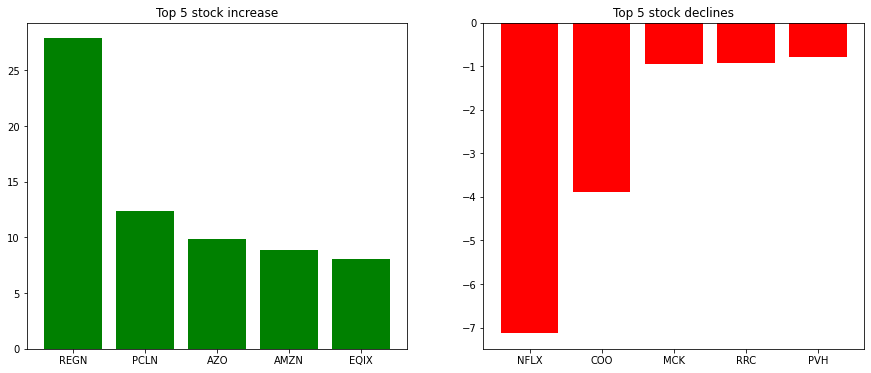

In [19]:
main('09/08/2015', data)

# 09/08 Report



**09/08 was not a public holiday in 2015.**

### Historical Highlights

- **1380** Battle on Kulikovo: Moscow's great monarch Dimitri defeats the Mongols beginning the decline of the Tatars

- **1504** Michelangelo's Statue of David is unveiled in Florence

- **1522** Spanish navigator Juan de Elcano returns to Spain, completing 1st circumnavigation of the globe (expedition began under Ferdinand Magellan)

- **1565** 1st permanent European settlement in the US founded at St. Augustine, Florida

- **1664** Dutch surrender colony of New Netherlands (including New York) to 300 English soldiers

- **1965** A small ad in New York’s Daily Variety attracts 437 young men interested in forming the world’s first manufactured boy band, "The Monkees"

- **1970** Black September hijackings begin, three airliners hijacked and blown up by Popular Front for the Liberation of Palestine

- **1986** "The Oprah Winfrey Show" is first broadcast nationally

- **1960** Nationwide release (US) of Alfred Hitchcock's "Psycho" starring Anthony Perkins and Janet Leigh

- **2001** Kylie Minogue releases her single "I Just Can't Get You Out of My Head", the biggest of her career

- **1973** Hank Aaron sets record of most HRs in 1 league (709)

- **1761** Marriage of George III of the United Kingdom to Charlotte of Mecklenburg-Strelitz (Queen Charlotte).

- **1864** Business magnate John D. Rockefeller (25) weds abolitionist Laura Spelman (24)

- **1897** Confederate General James Longstreet (76) weds Helen Dortch (34) at the governor's mansion in Atlanta, Georgia

- **2009** 90s pop sensation singer Peter Andre (36) divorces glamour model Katie Price (31) due to unreasonable behaviour after 3 years of marriage

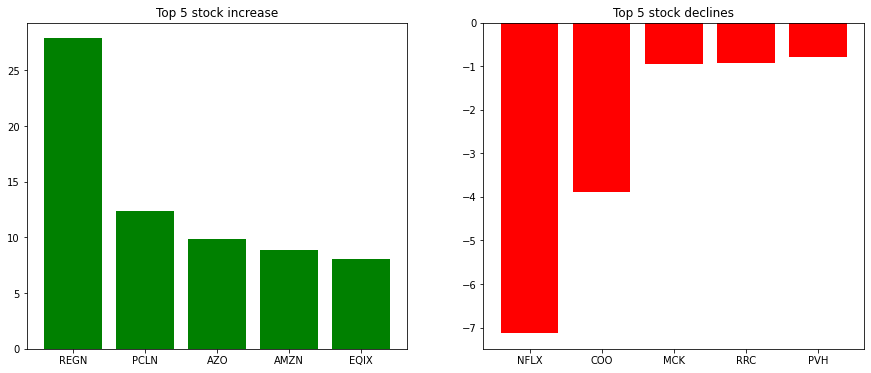

In [20]:
main('09/08/2015', data)